In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#Reading files
iterr1 = pd.read_csv("./sparkoutput/exec_time/Iteration 1.csv")
iterr2 = pd.read_csv("./sparkoutput/exec_time/Iteration 2.csv")
iterr3 = pd.read_csv("./sparkoutput/exec_time/Iteration 3.csv")
iterr4 = pd.read_csv("./sparkoutput/exec_time/Iteration 4.csv")
iterr5 = pd.read_csv("./sparkoutput/exec_time/Iteration 5.csv")

In [68]:
iterr1.head()

,delay_type,exec_time_hadoop,exec_time_hive
0,CarrierDelay,0.189384,12.187
1,NASDelay,0.031449,7.665
2,WeatherDelay,0.033497,7.332
3,LateAircraftDelay,0.029485,7.759
4,SecurityDelay,0.026534,6.841


In [69]:
#adding Iteration numbers
iterr1["iteration"] = 1
iterr2["iteration"] = 2
iterr3["iteration"] = 3
iterr4["iteration"] = 4
iterr5["iteration"] = 5

In [70]:
#combining df
df = pd.concat([iterr1,iterr2,iterr3,iterr4,iterr5], ignore_index=True)

In [71]:
df

,delay_type,exec_time_hadoop,exec_time_hive,iteration
0,CarrierDelay,0.189384,12.187,1
1,NASDelay,0.031449,7.665,1
2,WeatherDelay,0.033497,7.332,1
3,LateAircraftDelay,0.029485,7.759,1
4,SecurityDelay,0.026534,6.841,1
5,CarrierDelay,0.018662,13.668,2
6,NASDelay,0.022053,1.434,2
7,WeatherDelay,0.021572,6.349,2
8,LateAircraftDelay,0.015923,1.491,2
9,SecurityDelay,0.020936,1.303,2


In [72]:
def plot_comparison(delay):
    delay_data = df[df['delay_type'] == f'{delay}']

    # Create the plot
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot bars for execution times
    plt.bar(delay_data["iteration"],delay_data["exec_time_hadoop"], label="Hadoop", width=0.4, align='center')
    plt.bar(delay_data["iteration"],delay_data["exec_time_hive"], label="Hive", width=0.4, align='edge')

    # Set labels and title
    plt.xlabel(f"{delay}")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Comparison of Execution Times (Hadoop vs. Hive)")

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

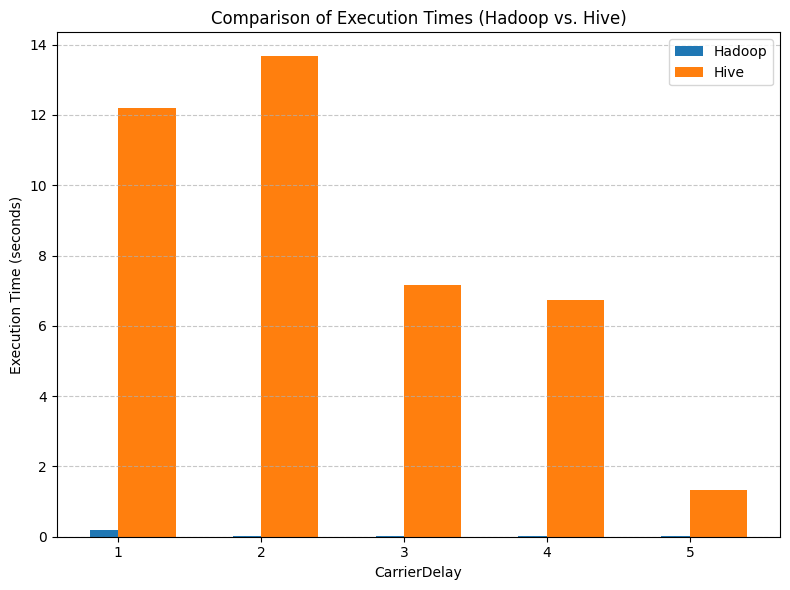

In [73]:
plot_comparison("CarrierDelay")

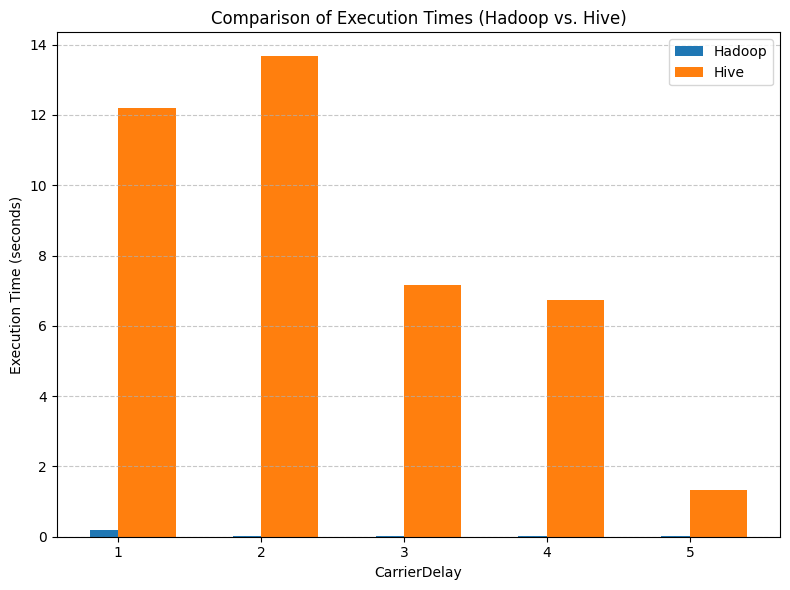

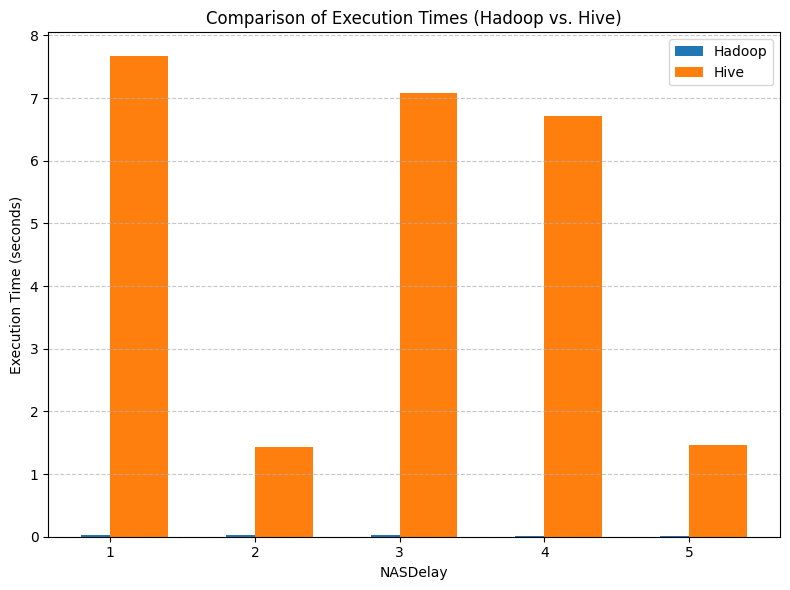

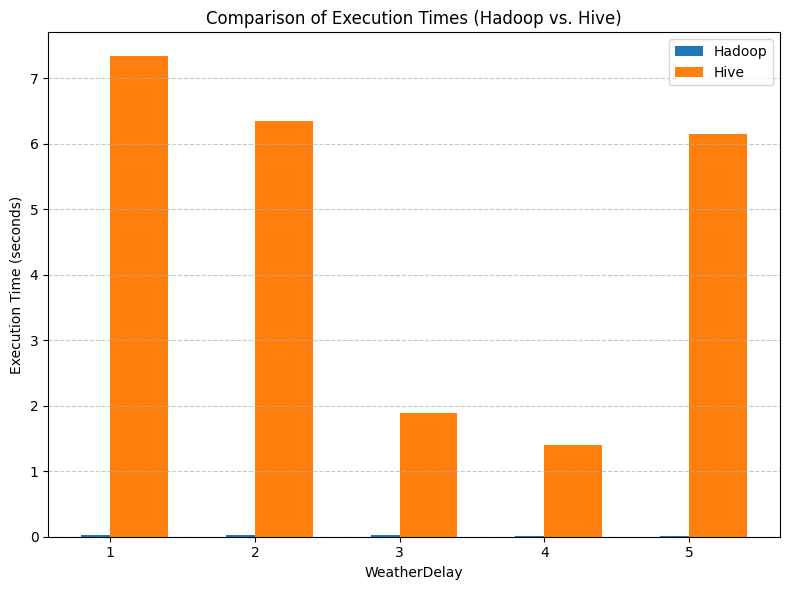

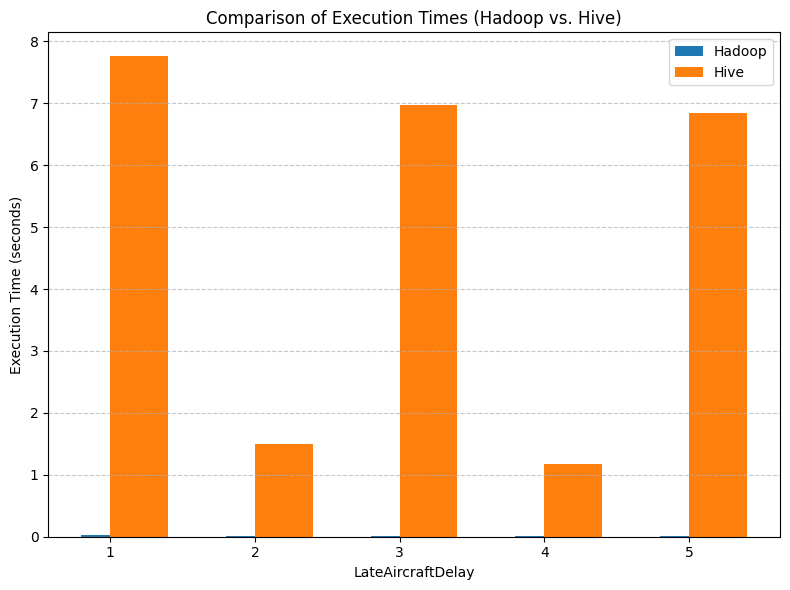

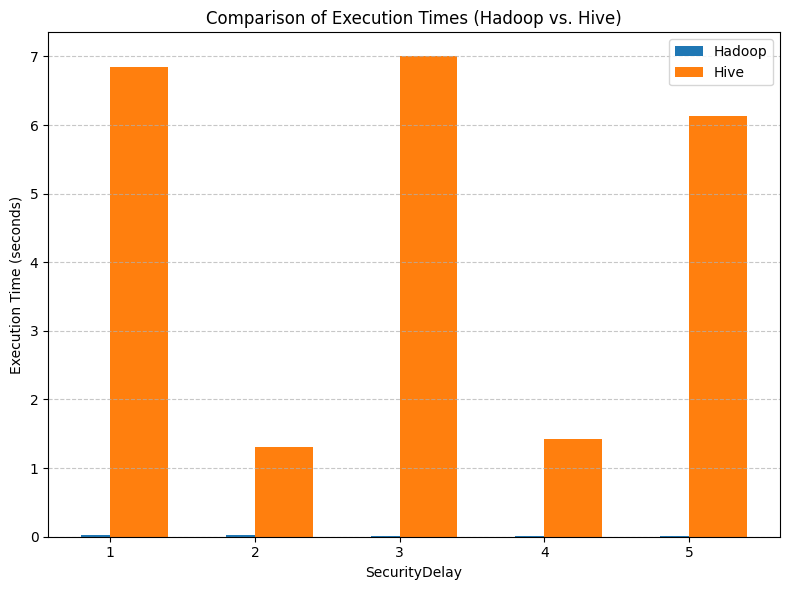

In [74]:
delays = df["delay_type"].unique()

for delay in delays:
    plot_comparison(delay)

In [75]:
result_df = df.groupby('delay_type').mean().reset_index().drop(columns=["iteration"])
result_df

,delay_type,exec_time_hadoop,exec_time_hive
0,CarrierDelay,0.050677,8.2226
1,LateAircraftDelay,0.017976,4.8510
2,NASDelay,0.020882,4.8712
3,SecurityDelay,0.017761,4.5392
4,WeatherDelay,0.021358,4.6232


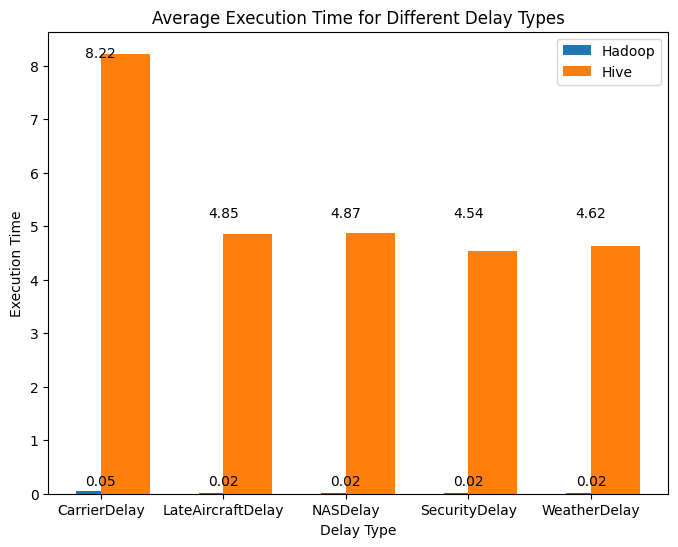

In [76]:
plt.figure(figsize=(8, 6))
plt.bar(result_df["delay_type"],result_df["exec_time_hadoop"], label="Hadoop", width=0.4, align='center')
plt.bar(result_df["delay_type"],result_df["exec_time_hive"], label="Hive", width=0.4, align='edge')

# Adding labels and title
plt.xlabel('Delay Type')
plt.ylabel('Execution Time')
plt.title('Average Execution Time for Different Delay Types')
plt.legend()

# Adding execution time values on top of the bars
for index, value in enumerate(result_df['exec_time_hadoop']):
    plt.text(index, round(value) + 0.1, f'{round(value,2)}', ha='center', va='bottom')

for index, value in enumerate(result_df['exec_time_hive']):
    plt.text(index, round(value) + 0.1, f'{round(value,2)}', ha='center', va='bottom')
# Show the plot
plt.show()